<div>
    <h2> Theory for linear regression approach </h2>
<img src="theory1.jpeg" alt="Drawing" style="height: 500px;"/>
<img src="theory2.jpeg" alt="Drawing" style="height: 500px;"/>
</div>

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def generate_data(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)*7
    y = 5*X + 2 + noise
    return X, y

In [103]:
def plot_data(X, y, title='Data'):
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

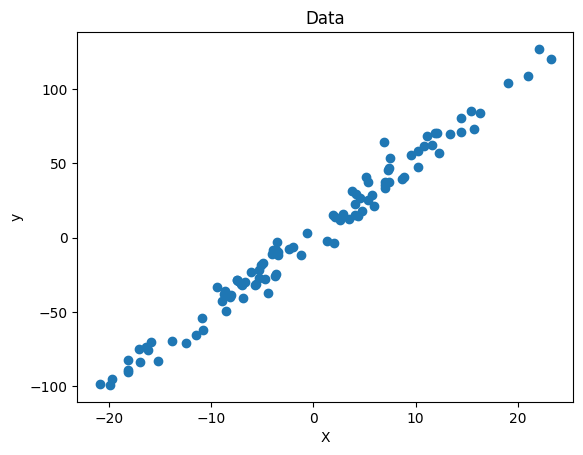

In [104]:
X, y = generate_data(100)
plot_data(X, y)

## Importance of Normalization/Standardization
Currently we have considered a single feature, it could be multiple features as well. The formula to get next iteration of feature (theta_i) multiplies the feature x^(i) with it, so if we have multiple features each of the theta will have corresponding feature value in the update step. Each feature will have its own scale (for eg. age, weight would have different scales) which will cause each feature to change with different amounts in each iteration which might cause issues in convergence. Standardization is the process of scaling the feature distribution to make its mean 0 and standard deviation 1. We apply it to all the features, so that the scale of all the features becomes same which helps with easy convergence.
Formula is,
X = (X - mean)/(std deviation)

In [105]:
def normalize_data(X):
    X = (X - X.mean())/X.std()
    return X


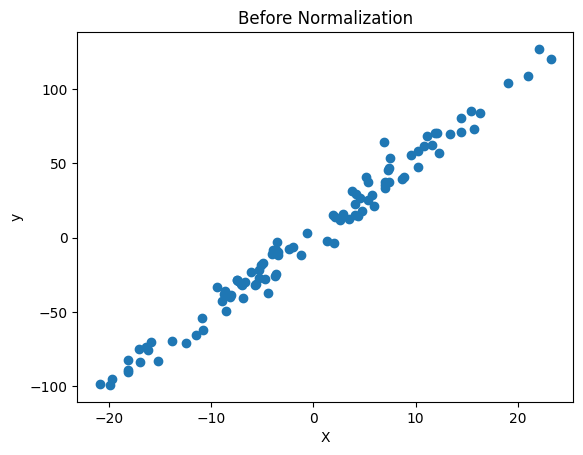

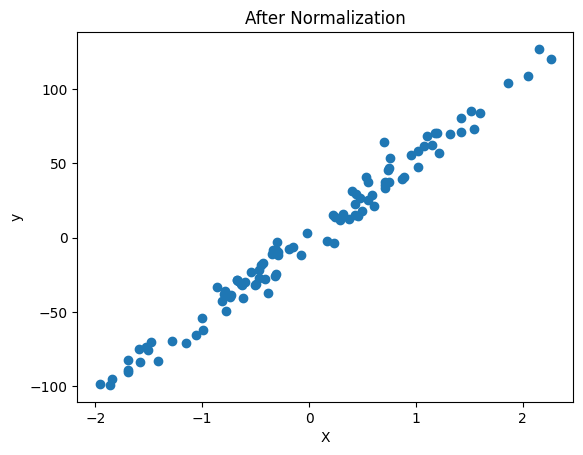

Mean(x) = 1.7763568394002505e-17, Std(X) = 0.9999999999999999


In [106]:
plot_data(X, y, 'Before Normalization')
X = normalize_data(X)
plot_data(X, y, 'After Normalization')
print(f"Mean(x) = {X.mean()}, Std(X) = {X.std()}")

In [107]:
def train_test_split(X, y, split_factor = 0.8):
    m = X.shape[0]
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)
    
    split = int(m*split_factor)
    # training split
    XT = data[:split, 0]
    yT = data[:split, 1]
    # testing split
    Xt = data[split:, 0]
    yt = data[split:, 1]
    return XT, yT, Xt, yt
    

Training data shape X (80,) y (80,)
Testing data shape X (20,) y (20,)


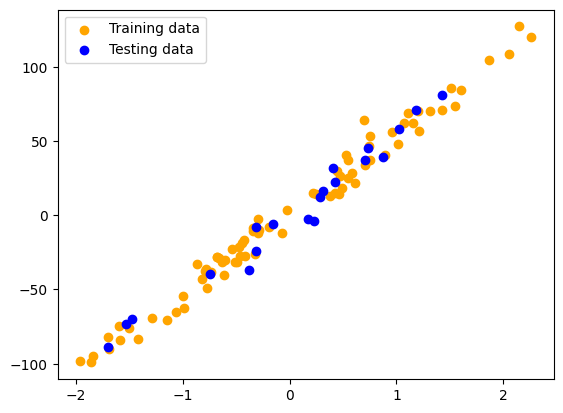

In [108]:
XT, yT, Xt, yt = train_test_split(X, y)
print(f"Training data shape X {XT.shape} y {yT.shape}")
print(f"Testing data shape X {Xt.shape} y {yt.shape}")
plt.scatter(XT, yT, color='orange', label='Training data')
plt.scatter(Xt, yt, color='blue', label='Testing data')
plt.legend()
plt.show()

In [109]:
def hypothesis(X, theta):
    return theta[0] + theta[1]*X


def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        e += (hypothesis(X[i], theta) - y[i])**2
    return e/(2*m)


def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
        grad[1] += (exp*X[i])
    return grad/m


def train(X, y, learning_rate = 0.1, iterations = 100):
    theta = np.zeros((2,))
    errors = []
    for i in range(iterations):
        grad = gradient(X, y, theta)
        theta[0] = theta[0] - (learning_rate * grad[0])
        theta[1] = theta[1] - (learning_rate * grad[1])
        errors.append(error(X, y, theta))

    # plotting the error
    plt.plot(errors)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.plot()
    return theta

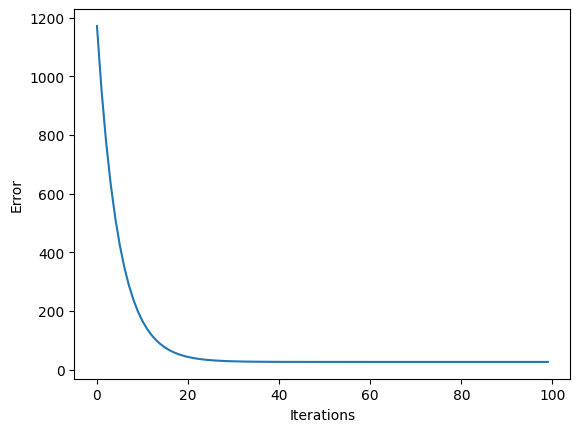

In [110]:
theta = train(X, y)

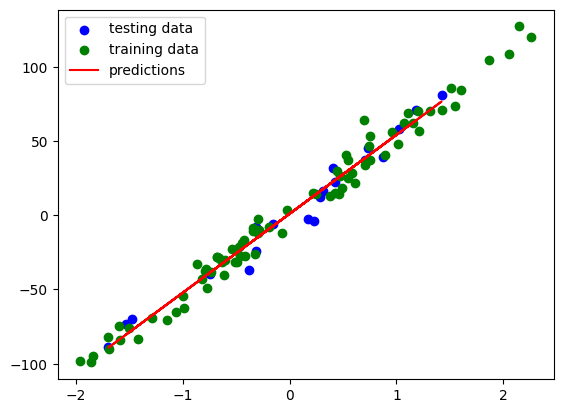

In [111]:
# evaluating the model against the testing data
yp = hypothesis(Xt, theta)
plt.scatter(Xt, yt, color='blue', label='testing data')
plt.scatter(XT, yT, color='green', label='training data')
plt.plot(Xt, yp, color='red', label='predictions')
plt.legend()
plt.show()

### R2 Score
R2 score or the coefficient of determination is a way to judge the accuracy of the predictions. R2 score of 1 means the predictions are exactly same as the actual values, 0 means they are same as mean output values. The closer the value is to 1, the better the predictions. 

<img src="r2score.jpeg" alt="R2 score formula" style="height: 250px;"/>

In [112]:
def r2score(y, yp):
    y_mean = y.mean()
    num = np.sum((yp-y)**2)
    denom = np.sum((y_mean-y)**2)
    return 1-num/denom

In [113]:
print(f"R2 score - {r2score(yt, yp)}")

R2 score - 0.9706703256505939


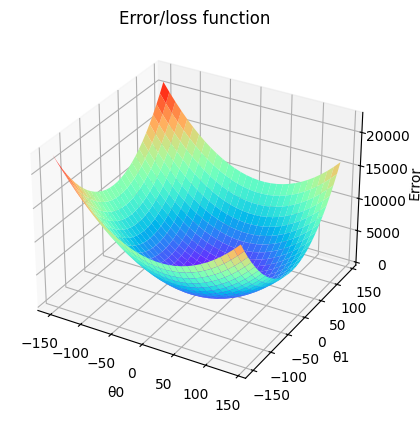

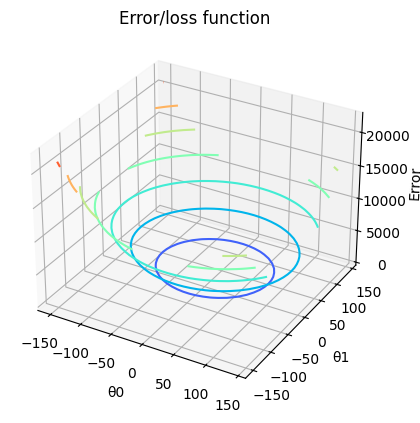

In [114]:
# 3D visualization of the loss function
T0 = np.arange(-150, 150, 10)
T1 = np.arange(-150, 150, 10)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for x in range(J.shape[0]):
    for y in range(J.shape[1]):
        yp = T0[x,y] + T1[x,y]*X
        J[x,y] = np.mean((yp-y)**2)/2

# 3d plot
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
axes.set_xlabel('θ0')
axes.set_ylabel('θ1')
axes.set_zlabel('Error')
plt.title('Error/loss function')
plt.show()

# contour plot
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.set_xlabel('θ0')
axes.set_ylabel('θ1')
axes.set_zlabel('Error')
plt.title('Error/loss function')
plt.show()

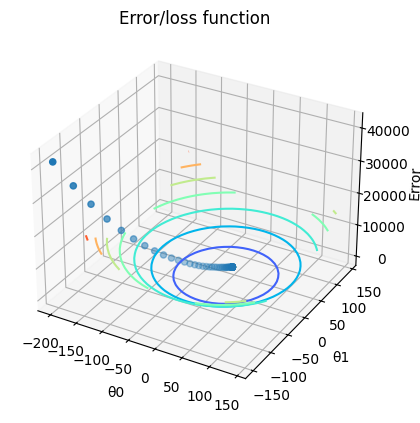

In [115]:
# visualizing gradient descent
def train(X, y, learning_rate = 0.1, iterations = 100):
    theta = np.array([-200, -150])
    error_list = []
    theta_list = []
    for i in range(iterations):
        error_list.append(error(X, y, theta))
        theta_list.append((theta[0],theta[1]))
        grad = gradient(X, y, theta)
        theta[0] = theta[0] - (learning_rate * grad[0])
        theta[1] = theta[1] - (learning_rate * grad[1])
    return theta, theta_list, error_list


theta, theta_list, error_list = train(XT, yT)
theta_list = np.array(theta_list)
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.set_xlabel('θ0')
axes.set_ylabel('θ1')
axes.set_zlabel('Error')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.title('Error/loss function')
plt.show()

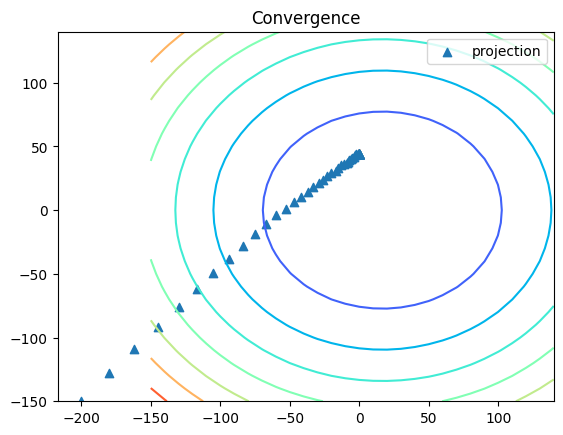

In [116]:
plt.contour(T0, T1, J, cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1], marker='^', label='projection')
plt.title('Convergence')
plt.legend()
plt.show()